#PREDICTING SALARY FOR PERSON WITH 160K SALARY AND 6.5 POSITION TO PREDICT

*In SVR we apply feature scalling because it does not have coefficient as in the case of linear , multiple or polynomial regression. We have an implicit equation here whereas there are coefficients in linear and other regression. Due to which we do not apply feature scalling in those models but it is required in SVR*

*No need to split the dataset to leverage the maximum data and understand correlation between salaries and position levels*

*We need to apply feature scalling on the dependent variable Y as well because the salaries(45k to 1 million) are much higher than the position levels(1-10). Hence the lower values of position levels might be neglected due to the higher values of salaries. This is why we need to apply feature scalling*

#IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#IMPORTING THE DATASET

In [ ]:
dataset=pd.read_csv('Position_Salaries.csv') #this makes a data frame
#features are the columns and dependent variable is the last column of the dataset

X=dataset.iloc[: , 1:-1].values 
#iloc stands for locate indexes and takes indexes of the columns and rows. here we will take  [rows,columns]  . 
#-1 index to exclude the last column

y=dataset.iloc[: , -1].values  
#-1 index is mentioned to only take the last column 

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y=y.reshape(len(y),1) #salaries was in 1d array format. We use reshape to convert it into 2d array because feature scalling expects 2d array

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


#Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


#Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#Predicting a result with SVR

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.fit_transform([[6.5]])).reshape(-1,1)) 
#we have to use the scalled value of 6.5.
#this is why we use sc_X.fit_transform to get the scalled value of position level 6.5
#now to get the value of the scalling of 6.5 we apply reverse scalling because we have applied scalling on y as well.
#to get the salary we do reverse scalling

array([[131106.77303274]])

#Visualizing the SVR results

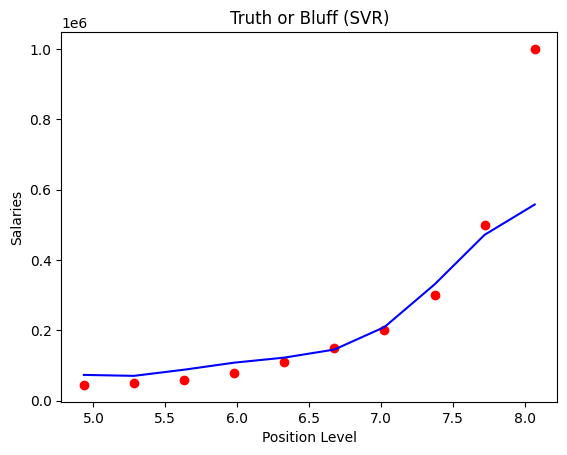

In [ ]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)) ,color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()